In [1]:
# Principle component analysis - PCA

In [2]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# loading the dataset

df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.shape

(178, 14)

In [7]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [8]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


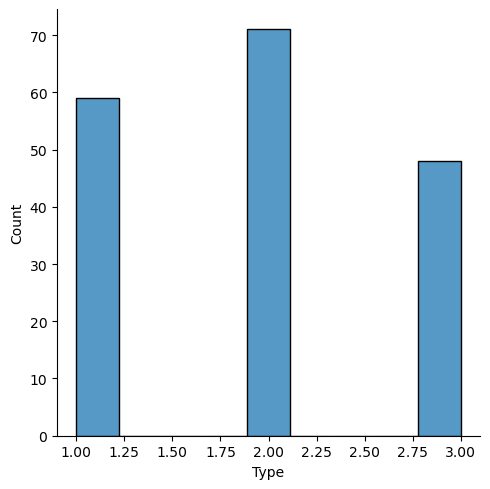

In [10]:
# Visualizations

sns.displot(df['Type'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\152538008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Type'])


<Axes: xlabel='Type', ylabel='Density'>

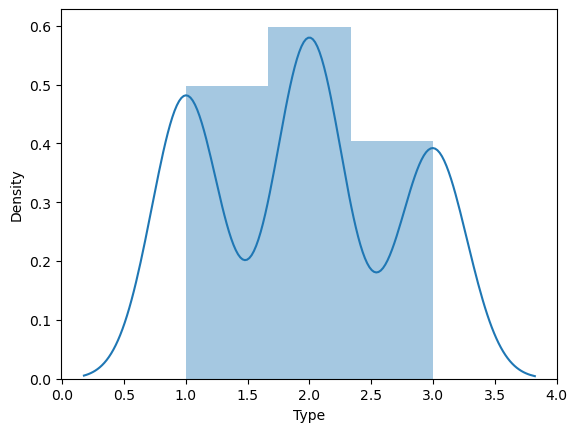

In [11]:
sns.distplot(df['Type'])

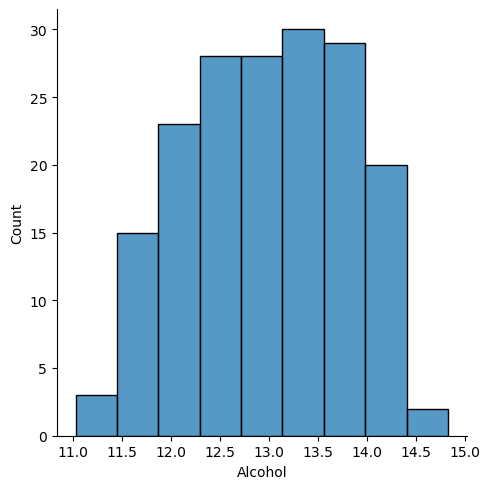

In [12]:
sns.displot(df['Alcohol'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\3372989474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'])


<Axes: xlabel='Alcohol', ylabel='Density'>

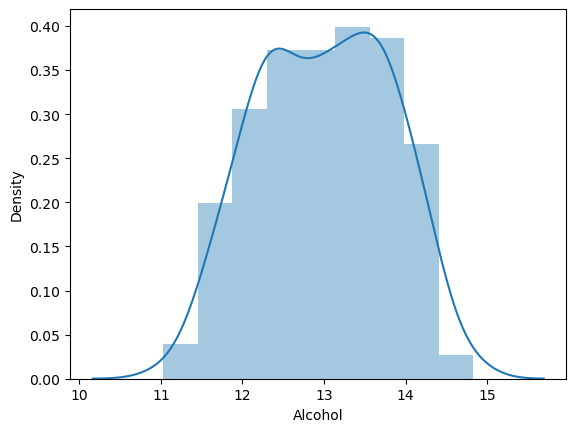

In [13]:
sns.distplot(df['Alcohol'])

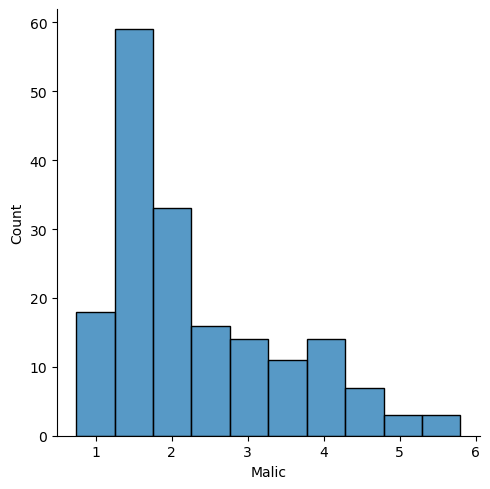

In [14]:
sns.displot(df['Malic'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\2061826635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Malic'])


<Axes: xlabel='Malic', ylabel='Density'>

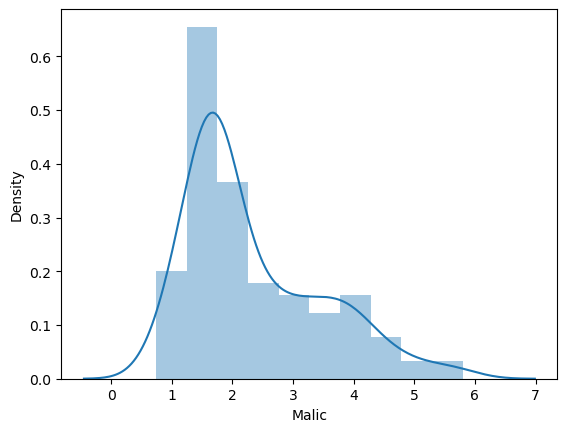

In [15]:
sns.distplot(df['Malic'])

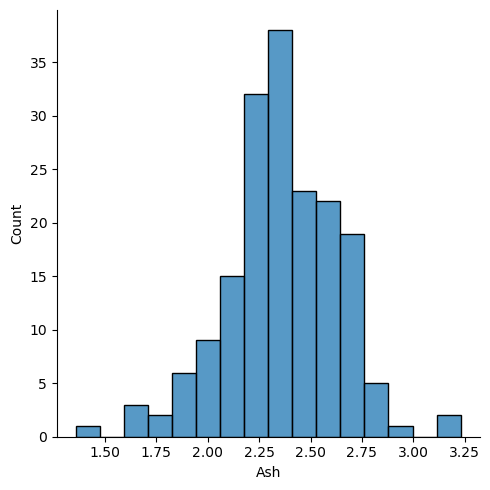

In [16]:
sns.displot(df['Ash'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\204490725.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ash'])


<Axes: xlabel='Ash', ylabel='Density'>

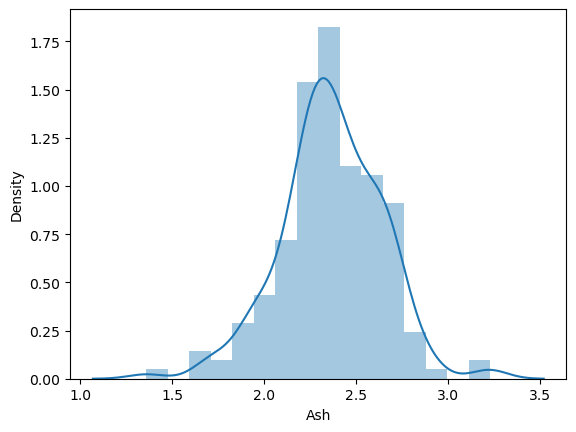

In [17]:
sns.distplot(df['Ash'])

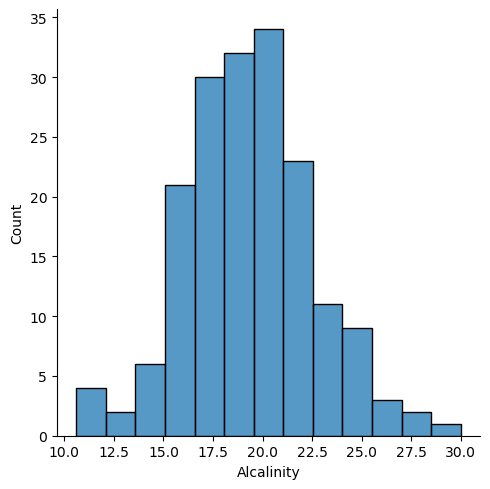

In [18]:
sns.displot(df['Alcalinity'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\1705784536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcalinity'])


<Axes: xlabel='Alcalinity', ylabel='Density'>

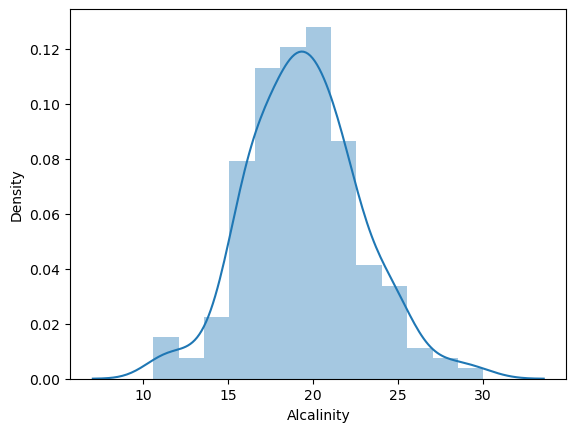

In [19]:
sns.distplot(df['Alcalinity'])

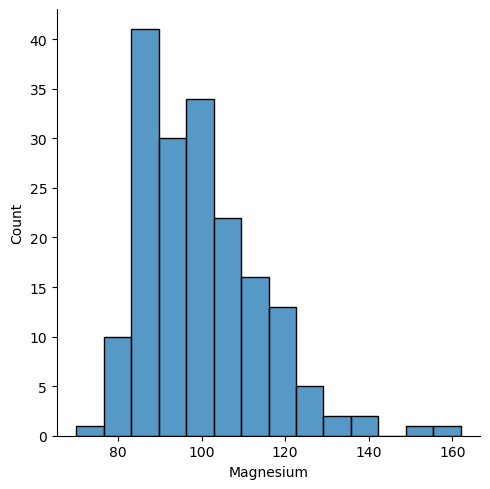

In [20]:
sns.displot(df['Magnesium'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\443967828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Magnesium'])


<Axes: xlabel='Magnesium', ylabel='Density'>

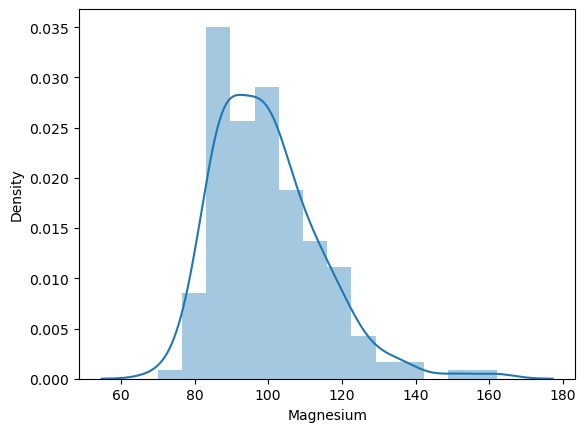

In [21]:
sns.distplot(df['Magnesium'])

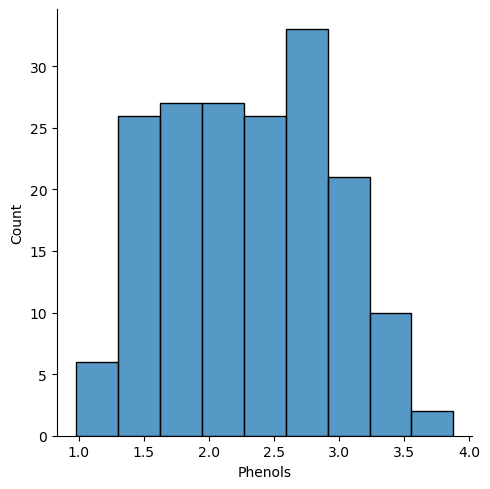

In [22]:
sns.displot(df['Phenols'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\2425175639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Phenols'])


<Axes: xlabel='Phenols', ylabel='Density'>

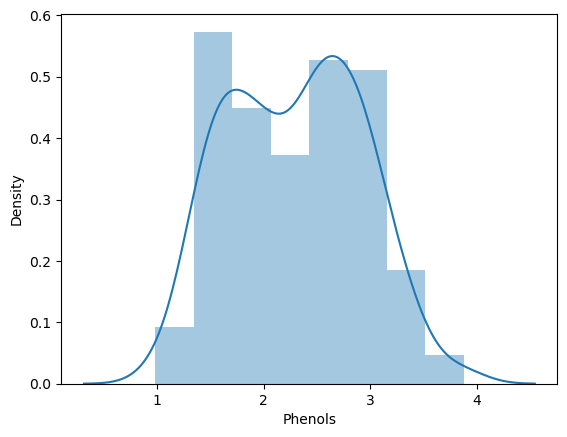

In [23]:
sns.distplot(df['Phenols'])

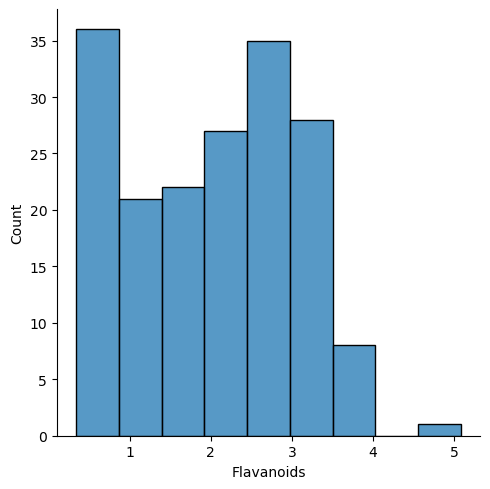

In [24]:
sns.displot(df['Flavanoids'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\1887268916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flavanoids'])


<Axes: xlabel='Flavanoids', ylabel='Density'>

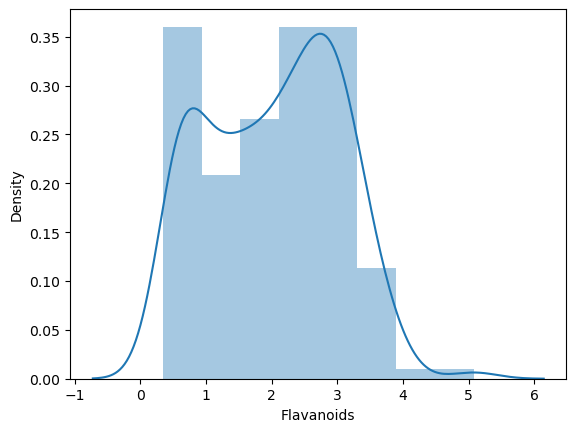

In [25]:
sns.distplot(df['Flavanoids'])

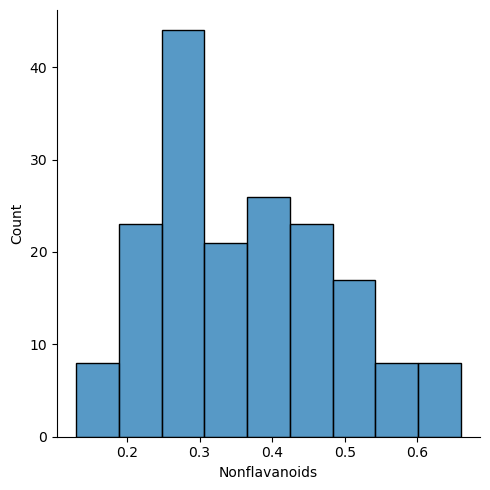

In [26]:
sns.displot(df['Nonflavanoids'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\3099233784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Nonflavanoids'])


<Axes: xlabel='Nonflavanoids', ylabel='Density'>

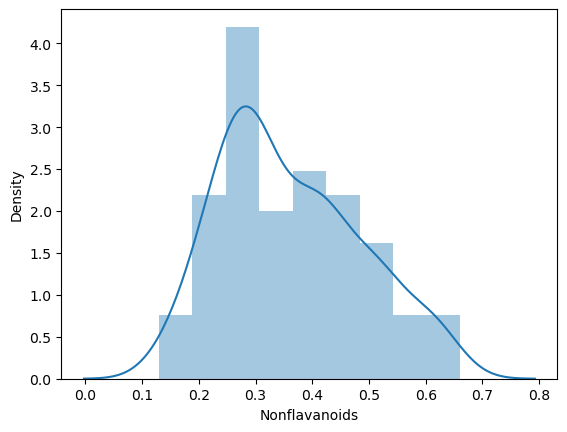

In [27]:
sns.distplot(df['Nonflavanoids'])

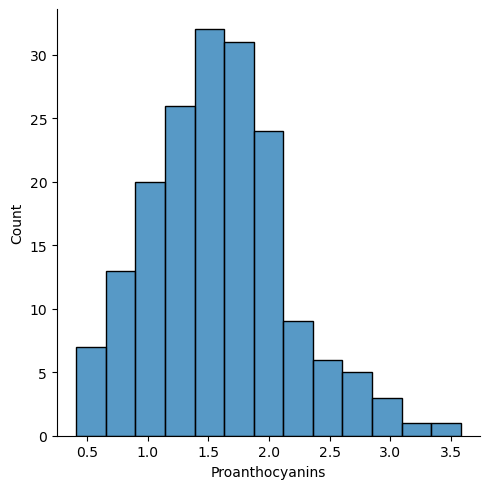

In [28]:
sns.displot(df['Proanthocyanins'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\3145401304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Proanthocyanins'])


<Axes: xlabel='Proanthocyanins', ylabel='Density'>

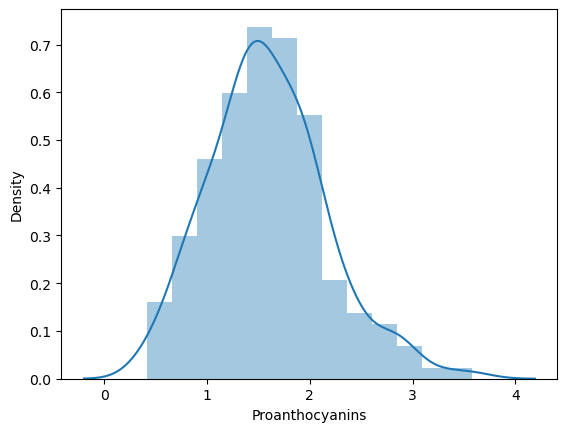

In [29]:
sns.distplot(df['Proanthocyanins'])

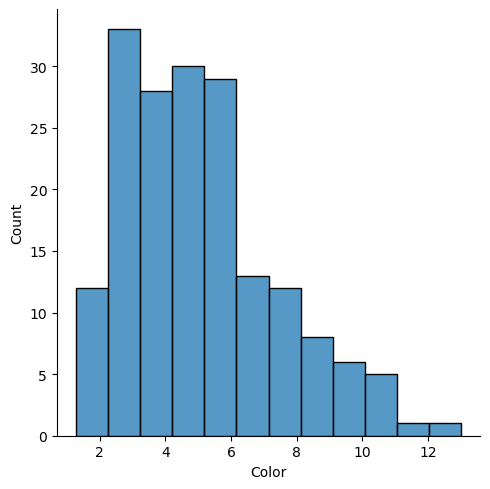

In [30]:
sns.displot(df['Color'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\3017103975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Color'])


<Axes: xlabel='Color', ylabel='Density'>

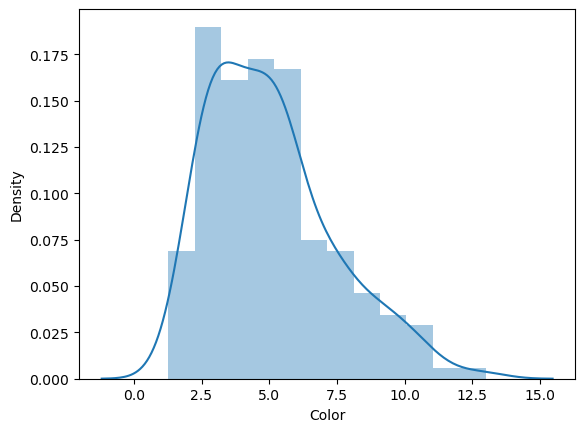

In [31]:
sns.distplot(df['Color'])

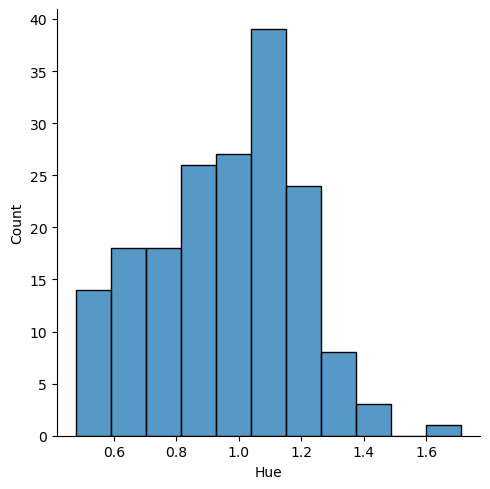

In [32]:
sns.displot(df['Hue'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\3296126758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hue'])


<Axes: xlabel='Hue', ylabel='Density'>

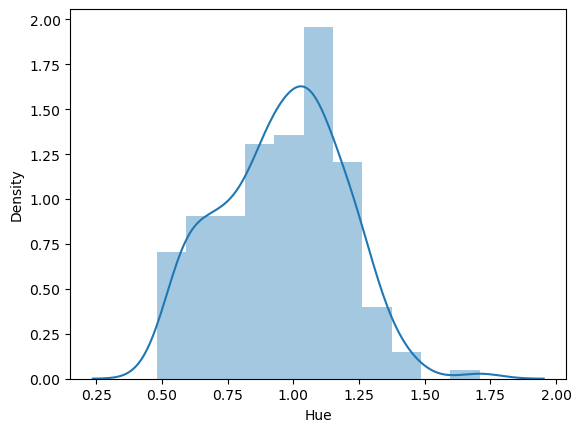

In [33]:
sns.distplot(df['Hue'])

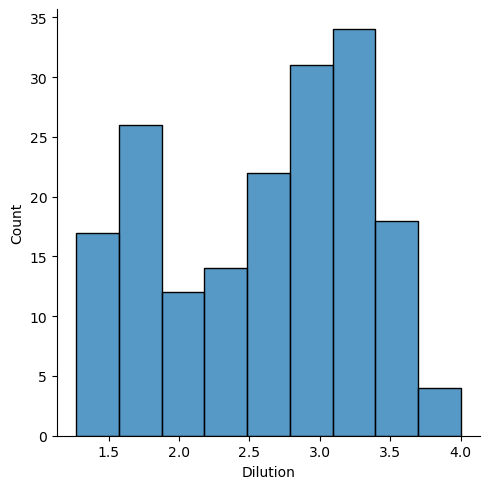

In [34]:
sns.displot(df['Dilution'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\3941495821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dilution'])


<Axes: xlabel='Dilution', ylabel='Density'>

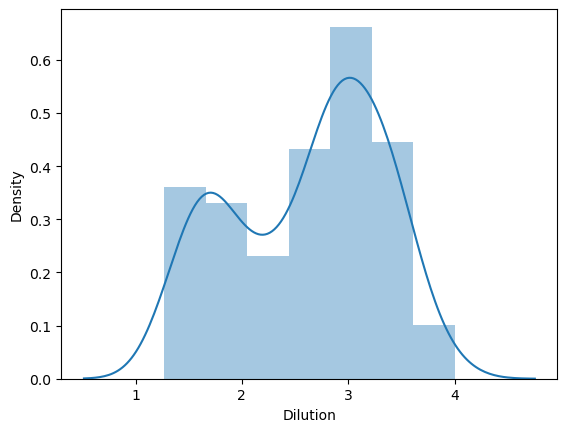

In [35]:
sns.distplot(df['Dilution'])

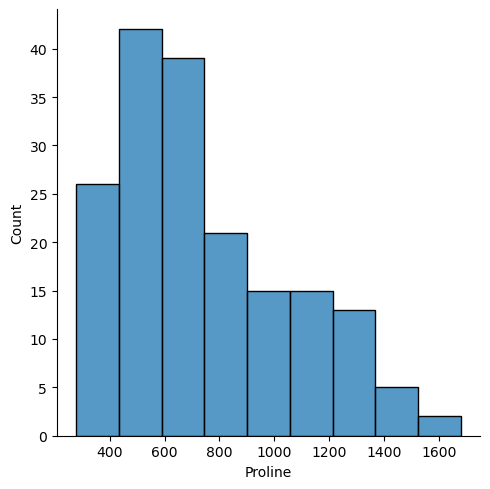

In [36]:
sns.displot(df['Proline'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_8916\496370018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Proline'])


<Axes: xlabel='Proline', ylabel='Density'>

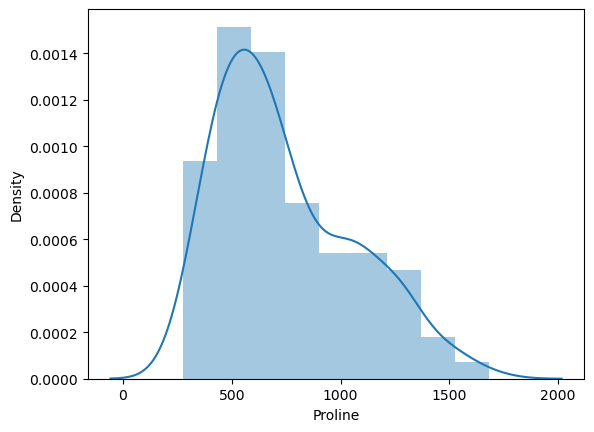

In [37]:
sns.distplot(df['Proline'])

In [38]:
# Handling missing values

df.isnull()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
df.isnull().sum()

# There are no empty values in any of the column

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [40]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

In [41]:
x = df.values[:,1:]
print(x)
print(x.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)


In [42]:
y = df.values[:,0]
print(y)
print(y.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
(178,)


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [49]:
# Dimensionality Reduction with PCA:
# Feature scaling - Standardization

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [48]:
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

In [51]:
# Non-standardized data
pca = PCA(n_components=2).fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [52]:
# Standardized data
pca_std = PCA(n_components=2).fit(x_train_std)
x_train_std = pca_std.transform(x_train_std)
x_test_std = pca_std.transform(x_test_std)

In [53]:
%matplotlib inline

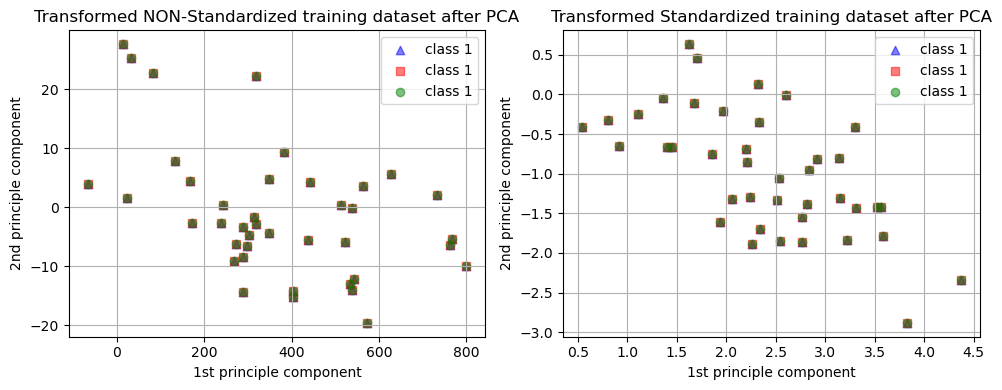

In [55]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))

for l,c,m in zip(range(1,4),('blue','red','green'),('^','s','o')):
    ax1.scatter(x_train[y_train==1,0] , x_train[y_train==1,1],
               color=c, label = 'class %s' %1, alpha=0.5, marker = m )
    

for l,c,m in zip(range(1,4),('blue','red','green'),('^','s','o')):
    ax2.scatter(x_train_std[y_train==1,0] , x_train_std[y_train==1,1],
               color=c, label = 'class %s' %1, alpha=0.5, marker = m )

ax1.set_title("Transformed NON-Standardized training dataset after PCA")
ax2.set_title("Transformed Standardized training dataset after PCA")

for ax in (ax1,ax2):
    ax.set_xlabel("1st principle component")
    ax.set_ylabel("2nd principle component")
    ax.legend(loc = "upper right")
    ax.grid()

plt.tight_layout()
plt.show()

In [56]:
# Clustering with Original Data:

# Model fitting and Model evaluation EDA2
# WCSS cluster sum of squares
# init is a special method used in the process
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
# Inertia measures how well dataset was clustered by K means
# It calculates measuring the distance between each data points and its centroid
# Squaring this distance and summing these squares across one cluster to form the cluster
# A good model is one with a low inertia and lower no of clusters

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [57]:
kmeans = KMeans(n_clusters = 6,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 3, 4, 5, 4, 3, 3, 1, 1, 4, 3, 3, 1, 4, 3, 3, 1, 4, 5, 5, 5,
       1, 1, 5, 5, 3, 3, 5, 1, 3, 4, 1, 3, 1, 5, 5, 1, 1, 5, 5, 1, 1, 2,
       5, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 5, 2, 5, 0, 0, 1, 5, 0, 0, 0, 5, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 5, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 5, 0, 2, 5, 5, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 5, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 5, 2, 0, 0, 2, 5, 5, 5,
       5, 2])

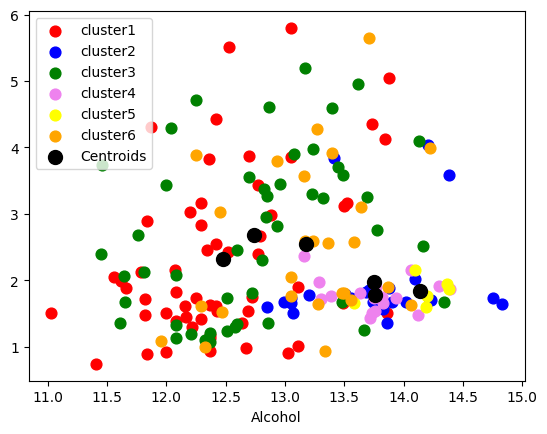

In [58]:
# clusters = 6

plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=60,c='red',label='cluster1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=60,c='blue',label='cluster2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=60,c='green',label='cluster3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s=60,c='violet',label='cluster4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s=60,c='yellow',label='cluster5')
plt.scatter(x[y_kmeans == 5,0],x[y_kmeans == 5,1],s=60,c='orange',label='cluster6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Alcohol')
plt.legend()

In [59]:
# Elbow curve for different K values

# Model fitting and Model evaluation EDA2
# WCSS=WITHIN CLUSTER SUM OF SQUARES, Euclidean distance
# init is a special method  used in the process of initializing an object
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [60]:
kmeans =KMeans(n_clusters=6,init="k-means++",random_state= 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 3, 4, 5, 4, 3, 3, 1, 1, 4, 3, 3, 1, 4, 3, 3, 1, 4, 5, 5, 5,
       1, 1, 5, 5, 3, 3, 5, 1, 3, 4, 1, 3, 1, 5, 5, 1, 1, 5, 5, 1, 1, 2,
       5, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 5, 2, 5, 0, 0, 1, 5, 0, 0, 0, 5, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 5, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 5, 0, 2, 5, 5, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 5, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 5, 2, 0, 0, 2, 5, 5, 5,
       5, 2])

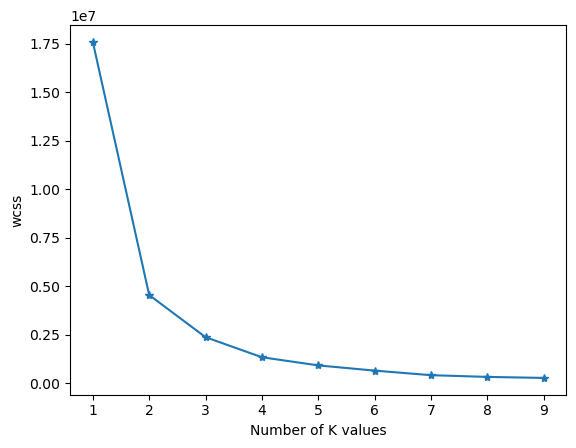

In [61]:
# Elbow method to optimize no of clusters
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9],wcss,marker = '*')
plt.xlabel('Number of K values')
plt.ylabel('wcss')
plt.show()

In [62]:
# Silhouette score

# The silhouette score runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating 
# a poor match between the data points and their corresponding cluster. 
# The silhouette score threshold, which is used to 
# assess the quality of a cluster, is commonly set at 0.5

# Used to evaluate quality of clustering in kmeans as well as dbscan
# A score more than 0.5 indicates high quality cluster
# A score less than 0.5 indicates high quality cluster

from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_)

0.5656413100386375

In [63]:
# Clustering with PCA Data:

# Clustering with Original Data:

# Model fitting and Model evaluation EDA2
# WCSS cluster sum of squares
# init is a special method used in the process
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
  kmeans.fit(x_train_std)
  wcss.append(kmeans.inertia_)
# Inertia measures how well dataset was clustered by K means
# It calculates measuring the distance between each data points and its centroid
# Squaring this distance and summing these squares across one cluster to form the cluster
# A good model is one with a low inertia and lower no of clusters

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [64]:
kmeans = KMeans(n_clusters = 6,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x_train_std)
y_kmeans

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 5, 2, 4, 2, 5, 4, 2, 2, 3, 2, 2, 3, 1, 0, 4, 0, 4, 1, 3, 4,
       2, 5, 3, 0, 0, 5, 2, 1, 5, 0, 0, 0, 3, 3, 1, 1, 3, 1, 2, 4, 2, 1,
       1, 3, 1, 3, 3, 1, 5, 0, 1, 0, 0, 3, 2, 4, 2, 5, 1, 1, 0, 5, 1, 4,
       0, 0, 4, 1, 4, 5, 3, 4, 3, 2, 1, 0, 2, 2, 1, 4, 2, 1, 2, 0, 4, 4,
       0, 1, 5, 0, 2, 4, 2, 5, 5, 4, 3, 0, 3, 3, 5, 5, 0, 0, 4, 3, 5, 5,
       1, 1, 2, 0, 0, 0, 4, 4, 1, 0, 3, 0, 1, 5])

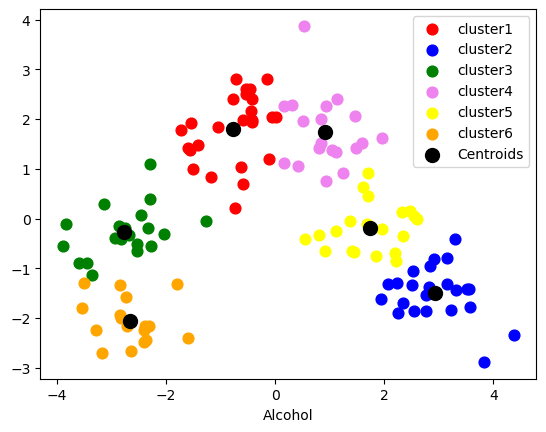

In [65]:
# clusters = 6

plt.scatter(x_train_std[y_kmeans == 0,0],x_train_std[y_kmeans == 0,1],s=60,c='red',label='cluster1')
plt.scatter(x_train_std[y_kmeans == 1,0],x_train_std[y_kmeans == 1,1],s=60,c='blue',label='cluster2')
plt.scatter(x_train_std[y_kmeans == 2,0],x_train_std[y_kmeans == 2,1],s=60,c='green',label='cluster3')
plt.scatter(x_train_std[y_kmeans == 3,0],x_train_std[y_kmeans == 3,1],s=60,c='violet',label='cluster4')
plt.scatter(x_train_std[y_kmeans == 4,0],x_train_std[y_kmeans == 4,1],s=60,c='yellow',label='cluster5')
plt.scatter(x_train_std[y_kmeans == 5,0],x_train_std[y_kmeans == 5,1],s=60,c='orange',label='cluster6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Alcohol')
plt.legend()

In [66]:
# Elbow curve for different K values

# Model fitting and Model evaluation EDA2
# WCSS=WITHIN CLUSTER SUM OF SQUARES, Euclidean distance
# init is a special method  used in the process of initializing an object
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(x_train_std)
    wcss.append(kmeans.inertia_)

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [67]:
kmeans =KMeans(n_clusters=6,init="k-means++",random_state= 42)
y_kmeans = kmeans.fit_predict(x_train_std)
y_kmeans

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 5, 2, 4, 2, 5, 4, 2, 2, 3, 2, 2, 3, 1, 0, 4, 0, 4, 1, 3, 4,
       2, 5, 3, 0, 0, 5, 2, 1, 5, 0, 0, 0, 3, 3, 1, 1, 3, 1, 2, 4, 2, 1,
       1, 3, 1, 3, 3, 1, 5, 0, 1, 0, 0, 3, 2, 4, 2, 5, 1, 1, 0, 5, 1, 4,
       0, 0, 4, 1, 4, 5, 3, 4, 3, 2, 1, 0, 2, 2, 1, 4, 2, 1, 2, 0, 4, 4,
       0, 1, 5, 0, 2, 4, 2, 5, 5, 4, 3, 0, 3, 3, 5, 5, 0, 0, 4, 3, 5, 5,
       1, 1, 2, 0, 0, 0, 4, 4, 1, 0, 3, 0, 1, 5])

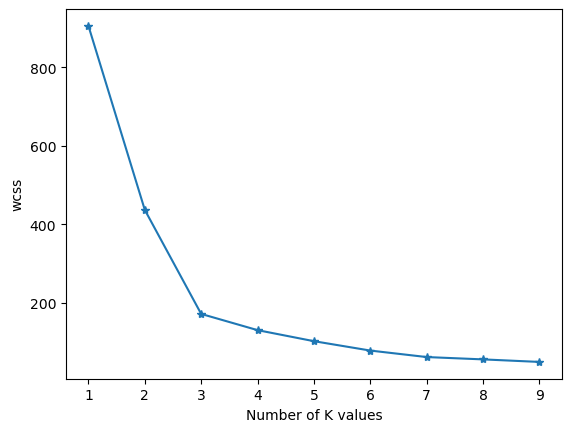

In [68]:
# Elbow method to optimize no of clusters
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9],wcss,marker = '*')
plt.xlabel('Number of K values')
plt.ylabel('wcss')
plt.show()

In [70]:
# Silhouette score

# The silhouette score runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating 
# a poor match between the data points and their corresponding cluster. 
# The silhouette score threshold, which is used to 
# assess the quality of a cluster, is commonly set at 0.5

# Used to evaluate quality of clustering in kmeans as well as dbscan
# A score more than 0.5 indicates high quality cluster
# A score less than 0.5 indicates high quality cluster

from sklearn.metrics import silhouette_score
silhouette_score(x_train_std,kmeans.labels_)

0.42700868469703523

In [ ]:
# Analysis

# Silhouette scores are 0.565 for original dataset and 0.427 for transformed data
# So the model is bit better for clustering on the original dataset

# Practical implications of using PCA and clustering in data analysis.

# PCA simplifies data for clustering by transforming the original variables into a new set of 
# uncorrelated variables (principal components). This reduction in dimensions helps to focus on the 
# most significant features, making the clustering process more efficient and interpretable.